## **Exploración de los datos**

### 0. Importando librerías

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Cargando los datos

- El código para graficar es tomado de los notebooks: 
  - [Prediction of Heart Disease ( Easy)](https://www.kaggle.com/code/arkalodh/prediction-of-heart-disease-easy/notebook)
- Son los datos limpiados en el notebook 01 y guardados en el repositorio en GitHub:

In [3]:
url = "https://raw.githubusercontent.com/ArleyF/proyecto_enfermedades_cardiacas/master/dataset/heart_2020_modified.csv"
df = pd.read_csv(url)

In [4]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,NaN,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,NaN,Yes,Very good,8.0,NaN,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,NaN,No,No


### 2. Graficando los datos respecto a la columna 'HeartDisease'

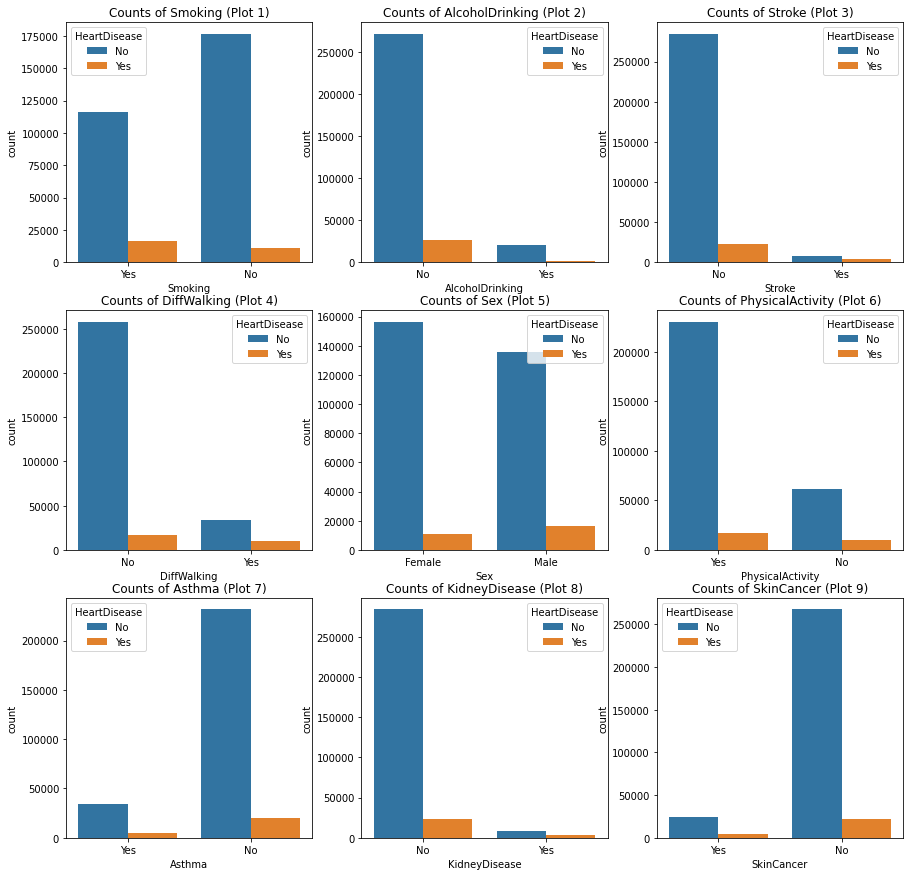

In [40]:
# Esta lista de listas contiene todas las columnas que tienen valores categóricos binarios
colRange = [['Smoking','AlcoholDrinking','Stroke'],['DiffWalking','Sex','PhysicalActivity'],['Asthma','KidneyDisease','SkinCancer']]
# Esta función imprime los gráficos de conteo contando el número de personas en cada categoría
def printCount(cols):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    row=0
    col=0
    p_count=1
    for row in range(3):
        for col in range(3):
            # reads column name from the list
            column = colRange[row][col]
            # plots the counts of the particular column
            sns.countplot(ax=axes[row,col],x=df[column],hue=df['HeartDisease'])
            # sets the title of the corresponding plot along with plot number
            axes[row,col].set_title("Counts of {} (Plot {})".format(column,p_count))
            p_count += 1
# Calling the function
printCount(colRange)



c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variación de las enfermedades cardíacas entre las Razas')

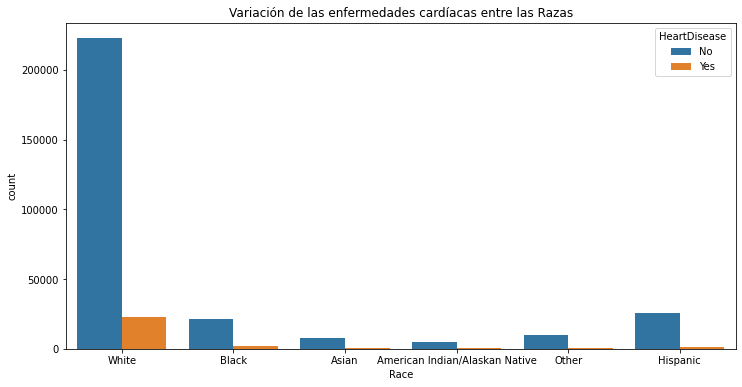

In [61]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# countplot plots the counts of each type of value in a particular column
# hue property is used to color code the counts according to a second categorical variable.
# plotting the graph
sns.countplot(df['Race'],hue=df['HeartDisease'])
plt.title('Variación de las enfermedades cardíacas entre las Razas')

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variación de las enfermedades cardíacas entre las personas diabéticas')

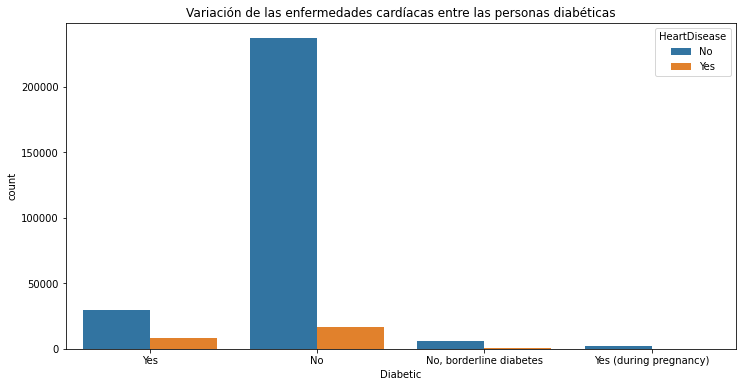

In [60]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting the graph
sns.countplot(df['Diabetic'],hue=df['HeartDisease'])
plt.title('Variación de las enfermedades cardíacas entre las personas diabéticas')

Text(0.5, 1.0, 'Distribución del IMC entre las personas')

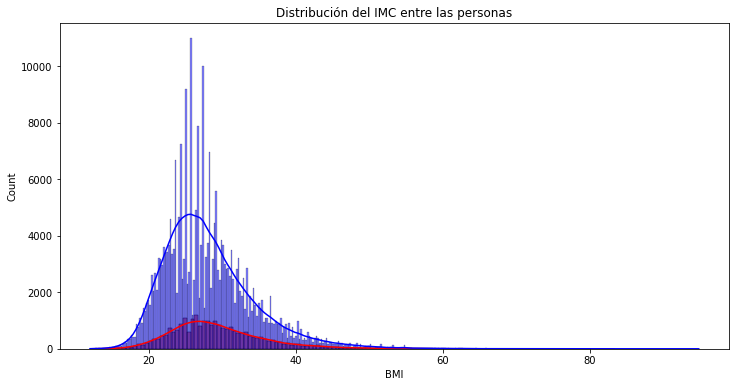

In [17]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# histplot plots the distribution of values in the particular column
# kde plots 'kernel distribution estimate' of that particular column
# plotting both graph on top of each other
sns.histplot(data=df[df['HeartDisease']=='Yes'],x='BMI',kde=True,color='red')
sns.histplot(data=df[df['HeartDisease']=='No'],x='BMI',kde=True,color='blue')
plt.title('Distribución del IMC entre las personas')

Text(0.5, 1.0, 'Patrón de salud física')

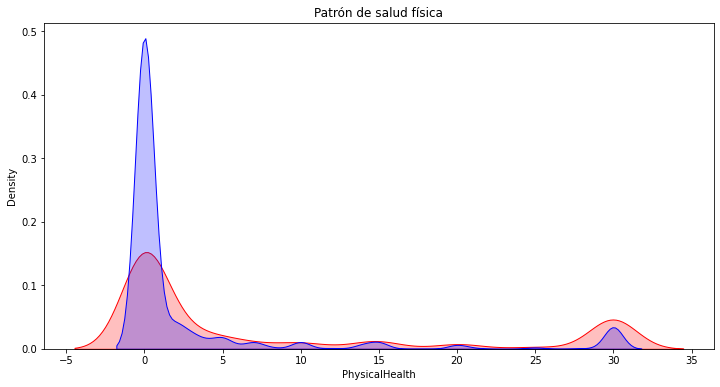

In [18]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# kdeplots show an estimated, smooth distribution of a single numerical variable
# plotting both graphs on top of each other
sns.kdeplot(df[df['HeartDisease']=='Yes']['PhysicalHealth'],shade=True,color='red')
sns.kdeplot(df[df['HeartDisease']=='No']['PhysicalHealth'],shade=True,color='blue')
plt.title('Patrón de salud física')

Text(0.5, 1.0, 'Variación de la salud mental')

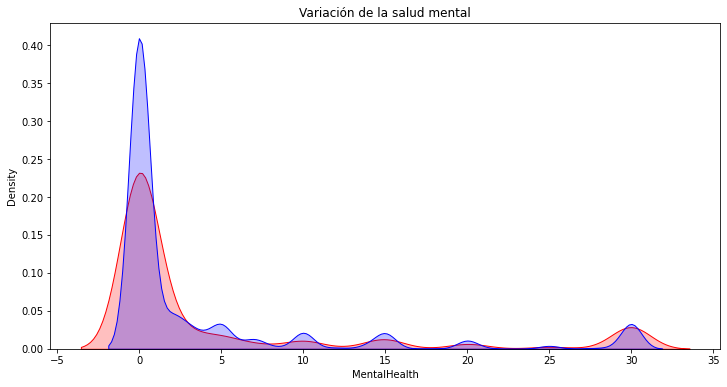

In [19]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting both graphs on top of each other
sns.kdeplot(df[df['HeartDisease']=='Yes']['MentalHealth'],shade=True,color='red')
sns.kdeplot(df[df['HeartDisease']=='No']['MentalHealth'],shade=True,color='blue')
plt.title('Variación de la salud mental')

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variación de las enfermedades cardíaca entre las edades de las personas')

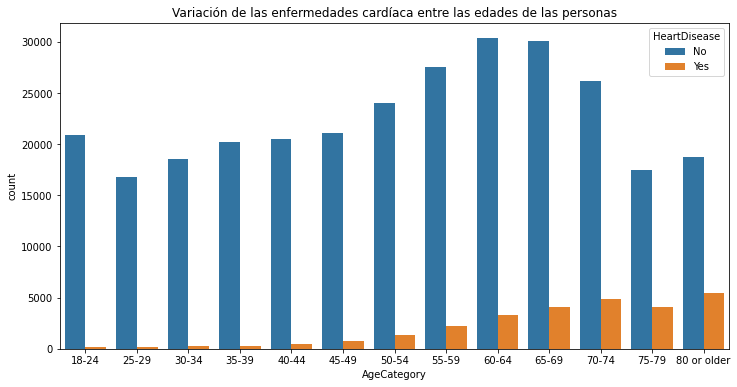

In [59]:
age_category = df.sort_values('AgeCategory',ascending=True)
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting the graph
sns.countplot(age_category['AgeCategory'],hue=df['HeartDisease'])
plt.title('Variación de las enfermedades cardíaca entre las edades de las personas')

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variación de las enfermedades cardíacas y la condición de la salud en general')

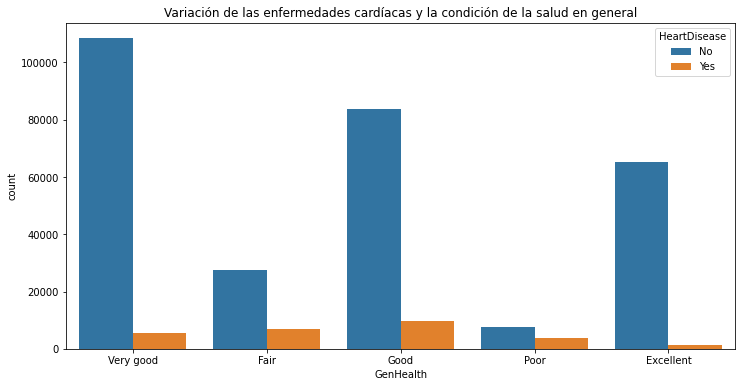

In [58]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting the graph
sns.countplot(df['GenHealth'],hue=df['HeartDisease'])
plt.title('Variación de las enfermedades cardíacas y la condición de la salud en general')

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variación de la enfermedad cardíaca entre las horas de sueño')

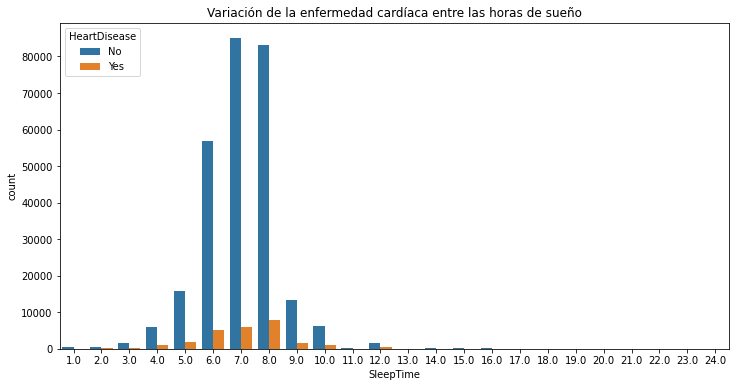

In [54]:
sleep_time = df.sort_values('SleepTime',ascending=True)
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting the graph
sns.countplot(sleep_time['SleepTime'],hue=df['HeartDisease'])
plt.title('Variación de la enfermedad cardíaca entre las horas de sueño')

Text(0.5, 1.0, 'Matriz de correlación')

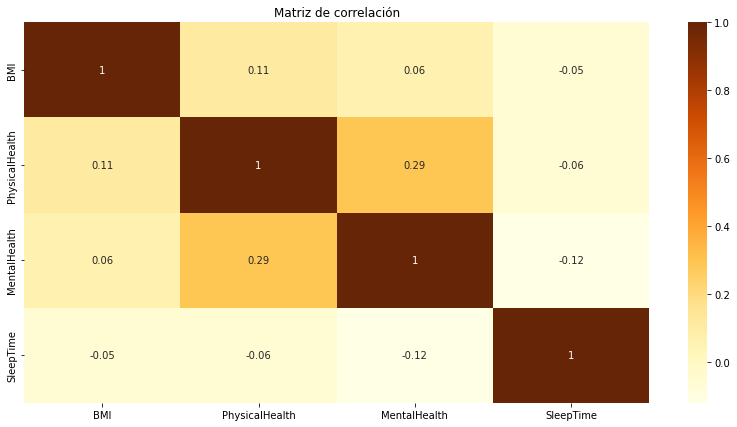

In [62]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')
plt.title('Matriz de correlación')